# INFO 2950 Fall 2022, Homework 3

## Discussion

Project Phase 1 is due Monday:

* Set up a Github repository for your project files (or using the file-sharing service of your choice).
* Meet with your group. Write down at least three ideas for datasets. Include as much information as possible about the availability of data.
* Submit a `.txt` file on CMS that contains a link to your Github repository and your dataset ideas. Include a “Questions for reviewers” section at the end of your submission, listing specific questions for your project mentor to answer in giving you feedback on this phase.

In section, discuss ideas for datasets and where you could find accessible data.


## Coding

You will turn in this notebook without any of the data files. We will not run your code, all cells must be executed and the notebook saved with output included.

The goal of this homework is to put linear regression into application with real-world data. You'll begin by reviewing linear regression, slope, and intercept and visualize your regression with artificial data. You'll also compare linear regression to correlation.

Then, you'll apply this knowledge to a dataset about visitors to National Parks collected from the website of the US National Park Service. You'll practice skills from prior weeks, like working with numpy arrays, pandas and SQL, and groupby, in combination with your new knowledge about linear regression.


In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys 
!{sys.executable} -m pip install ipython-sql 

## Problem 1 (5 Points)

Let's start with three numpy arrays `x1`, `y1` and `y2`. Run the cell below to initialize these variables

In [3]:
x1 = np.array([50, 6, 20, 72, 38, 17, 3, 88, 59, 13, 8, 89, 52, 1, 83, 91, 59, 70, 43, 7, 46, 34, 77, 80, 35])
y1 = np.array([129.41785382528082, 14.543392470720384, 65.69221345251731, 204.57574641020062, 84.1461656319166, 36.896576076270485, 50.730320387684785, 221.68586822882273, 125.51314035162619, 47.31400108964912, 10.914557679688443, 193.10675616074357, 127.54905678915085, -41.082006116444944, 148.12705418717417, 195.19281176897567, 111.92922199163941, 169.85618331488183, 78.54939811196972, -15.057592533382284, 144.64121922303886, 75.3555924878366, 179.4382051171981, 148.88129534466358, 69.64043188687043])
y2 = np.array([3815.417853825281, 59.543392470720384, 639.1922134525173, 7889.075746410201, 2201.1461656319166, 447.6465760762705, 58.980320387684785, 11726.185868228822, 5271.763140351626, 283.06400108964914, 95.41455767968844, 11961.856756160743, 4117.049056789151, -42.332006116444944, 10376.377054187175, 12501.442811768975, 5258.17922199164, 7430.8561833148815, 2796.79939811197, 48.192407466617716, 3259.6412192230387, 1765.3555924878367, 8975.188205117198, 9647.381295344663, 1861.8904318868704])

Now, create two scatterplots using the `regplot` function in `seaborn`. The first one should plot the pair of points in `x1` and `y1`. And, the second one for `x1` and `y2`. `regplot` is a scatter plot that also fits a regression line.


<AxesSubplot:>

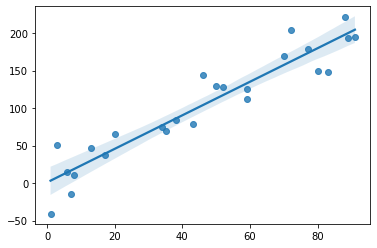

In [4]:
# scatterplot for x1 and y1

sns.regplot(data=None, x=x1, y=y1) 

<AxesSubplot:>

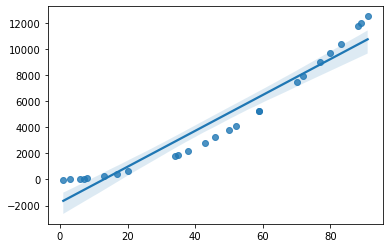

In [5]:
# scatterplot for x1 and y2

sns.regplot(data=None, x=x1, y=y2) 

**Describe the two plots and comment on whether they appear to be appropriate for linear regression, and why or why not.**

Your answer: 

I find that the first plot is appropriate for regression because homoskedastic and the data looks linear, but despite homoskedasticity, the second plot appears quadratic or exponential and so some type of exponential or quadratic regression line would fit it better. 

## Problem 2 (5 Points)

Create a `lineplot` using the points of `x1` and `y1`.

Now, let's refresh our memory. What's the equation of a line? It's `y = mx + c` where `m` is the **slope** and `c` is the **y-intercept** of that line.

Here, you need to compute the slope and intercept of the line created by plotting `(x1, y1)`. Use numpy operations to compute these values. Then, write the equation of this line in `y = mx + c` form. You can use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function of numpy to compute the slope and intercept. This function fits the input data inside a polynomial function. Here, you have to provide the degree of polynomial function along with data as parameter to `np.polyfit`. The degree for a *linear* function will be 1.

<AxesSubplot:>

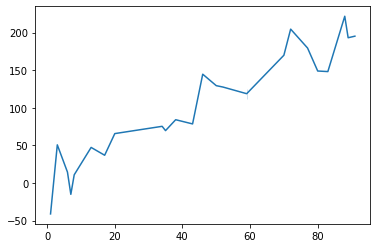

In [6]:
# lineplot for x1 and y1
sns.lineplot(x=x1, y=y1)


In [7]:
# compute slope and intercept of line containing (x1, y1) pairs

np.polyfit(x1, y1, 1) 

#y = 2.23681788x + 1.01393052

array([2.23681788, 1.01393052])

Compute the slope of this line using the vector formulation given below:

$ slope =  \frac {\sum_{i = 1} ^{n}(x_i - mean(X)) (y_i - mean(Y))} {\sum_{i = 1} ^{n}(x_i - mean(X))^2} $ 

Here, `X` and `Y` are equivalent to numpy arrays `x1` and `y1` respectively in our case and `n` is their number of elements. **Confidence Check:** the slope computed here should be equal to the one you got from numpy operation in previous cell. 

In [8]:
# compute slope using the given vector formula

sum((x1-np.mean(x1)) * (y1-np.mean(y1)) ) / sum(  (x1 -np.mean(x1))**2  )

2.236817879345948

## Problem 3 (5 Points)

Install the `scikit-learn` module to your INFO 2950 environment. Remember, you can do this through Anaconda Navigator. Refer to hw0 (on how to set up Python and a virtual environment) if you need a refresher on installing modules to a specific environment. 

Train a [scikit-learn](https://scikit-learn.org/stable/index.html) linear regression model to **predict slope and intercept** of the lines created through plotting pairs of `(x1, y1)` and `(x1, y2)`. Refer to the documentation of scikit-learn [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Heads-up:** The first input to fit a `LinearRegression` has to be a 2D array.

In [9]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [10]:
# scikit-learn linear regression
x1.reshape(-1,1) 
y2.reshape(-1,1) 
y1.reshape(-1,1)
y1r = linear_model.LinearRegression().fit(x1.reshape(-1,1),y1.reshape(-1,1))
y2r = linear_model.LinearRegression().fit(x1.reshape(-1,1),y2.reshape(-1,1))
print(y1r.coef_)
print(y1r.intercept_)
print(y2r.coef_)
print(y2r.intercept_)

[[2.23681788]]
[1.01393052]
[[137.50973875]]
[-1778.13217781]


Is the `slope` you got here *exactly* the same as you got before? Probably, NO. It's because of the precision of `float` type variables. You can print any `float` variable up to the specific decimal point you want to. You have to use python format string for that. You can find more about printing a formatted string [here](https://docs.python.org/3/tutorial/inputoutput.html).



```
>>> a = 1/7
>>> print(a)
0.14285714285714285

## look:  ↓   this is an `f` string, so it knows about the variable `a`
>>> print(f'formatted string: {a:.3f}')
0.143
```

[You'll use string formatting in a later question.]

## Problem 4 (10 Points)

Load the `national_parks_visitors.csv` data using `pandas`. Print the dataframe columns, shape, and head. The data is in wide format: a variable is encoded in column names. Convert the dataframe to a tidy or narrow format. In the tidy format dataframe, the columns should be `Park`, `State(s)`, `Region`, `Year` and `Visitors`. 

**Identify the variable that is encoded in column names**
the variable encoded in the column names is the year 

In [11]:
national_park_df = pd.read_csv("national_parks_visitors.csv", thousands=",")

In [12]:
# Print columns and shape
print(national_park_df.columns)
print(national_park_df.shape) 

Index(['Park', 'State(s)', 'Region', 'Lat', 'Long', 'Area (acres)', '2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006'],
      dtype='object')
(63, 22)


In [13]:
# Print head of df
print(national_park_df.head)


<bound method NDFrame.head of                    Park       State(s)         Region    Lat    Long  \
0   Gates of the Arctic         Alaska         Alaska  67.78 -153.30   
1    Wrangell–St. Elias         Alaska         Alaska  61.00 -142.00   
2                Katmai         Alaska         Alaska  58.50 -155.00   
3           Glacier Bay         Alaska         Alaska  58.50 -137.00   
4        North Cascades     Washington   Pacific West  48.70 -121.20   
..                  ...            ...            ...    ...     ...   
58         Capitol Reef           Utah  Intermountain  38.20 -111.17   
59        Indiana Dunes        Indiana        Midwest  41.65  -87.05   
60               Arches           Utah  Intermountain  38.68 -109.57   
61      New River Gorge  West Virginia      Northeast  38.07  -81.08   
62          Hot Springs       Arkansas        Midwest  34.51  -93.05   

    Area (acres)     2021     2020     2019     2018  ...     2015     2014  \
0     7523897.45     7362 

In [14]:
# Wide ---> Tidy
npdf = national_park_df.melt(id_vars = [ 'Park', 'State(s)', 'Region'], value_vars = ['2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006'], var_name = 'Year', value_name = 'Visitors') 

npdf.head()

,Park,State(s),Region,Year,Visitors
0,Gates of the Arctic,Alaska,Alaska,2021,7362
1,Wrangell–St. Elias,Alaska,Alaska,2021,50189
2,Katmai,Alaska,Alaska,2021,24764
3,Glacier Bay,Alaska,Alaska,2021,89768
4,North Cascades,Washington,Pacific West,2021,17855


## Problem 5 (10 points)
Train a scikit-learn linear regression model to predict the number of park visitors based on the given year. Use your tidy-formatted `national_park_df` and follow these steps:
- You'll eventually use the `"Year"` column to predict numbers in the `"Visitors"` column. Make sure that this column is a numeric object. If it isn't, convert it. (**Confidence check:** the data type of both columns should be `'int64'`.) Print out the `"Year"` column's dtype. 
- Assign the `"Year"` and `"Visitors"` columns to two new variables, `X` and `y`, respectively. Make sure these are the type of two-dimensional arrays your model requires (hint: there are multiple ways to get columns into the right format. You might look into reshaping or double bracketing). 
  - Print the shape of `X` and `y`.
- Fit a linear regression model to `X` (years) and `y` (visitors). Name this model `visitor_model`. 
  - Use **string formatting** (what you learned about in problem 3) to print the trained model's slope coefficient, rounded to two decimals. 
    - Your print statement should look like the following: `The model's slope is 24954.83`
  - Explain what the slope means in human terms (i.e., how would you explain this to your friend who doesn't know any data science?)

In [15]:


# Check column values
npdf["Year"] = pd.to_numeric(npdf["Year"])
print(npdf["Year"].dtype) 
print(npdf['Visitors'].dtype)

int64
int64


In [16]:
# Create X and y and print shapes
x = npdf["Year"].to_numpy() 
x = x.reshape( -1,1 )
y = npdf["Visitors"].to_numpy() 
y = y.reshape(-1,1) 

print(x.shape)
print(y.shape)

(1008, 1)
(1008, 1)


In [17]:
# Fit model and print the coefficient with string formatting

visitor_model = linear_model.LinearRegression().fit(x.reshape(-1,1),y.reshape(-1,1))
yv_str =(visitor_model.coef_)
print(str(np.round(yv_str, decimals=2)))   


[[24954.83]]


**What does the slope coefficient tell us about national park visitors?**

the slope tells us with each increasing year, how many new visitors we expect to see in the park. but we should not extrapolate, and only use this as a prediction within the year and visitor set we've been given. 

## Problem 6 (5 points)
Use your trained `visitor_model` to make predictions about unknown information.  
- Using numpy, create a new 2d array of years 2022-2031.
- Use `visitor_model` to predict the number of visitors for these upcoming years. Print these predictions.

In [18]:
# Create array of upcoming years
uy = np.arange(2022, 2032, 1, dtype=int )
uy.reshape(-1,1 )
visitor_model.predict(uy.reshape(-1,1 ))

array([[1423283.31071428],
       [1448238.14220355],
       [1473192.9736928 ],
       [1498147.80518207],
       [1523102.63667133],
       [1548057.46816059],
       [1573012.29964986],
       [1597967.13113912],
       [1622921.96262838],
       [1647876.79411764]])

In [54]:
# Print predicted visitors

print (visitor_model.predict(uy.reshape(-1,1 )))

#print(npdf.loc[:,"Year"].head)

[[1423283.31071428]
 [1448238.14220355]
 [1473192.9736928 ]
 [1498147.80518207]
 [1523102.63667133]
 [1548057.46816059]
 [1573012.29964986]
 [1597967.13113912]
 [1622921.96262838]
 [1647876.79411764]]


## Problem 7 (10 points)

You'll perform linear regression on different groupings and slices of the `national_park_df` in the next few problems. Since you'll be doing the same thing multiple times, you'll want to create a function to perform this task! 

Create a function called `slope_coefficient` that is passed a dataframe object, trains a regression model on years to predict visitors, and returns the model's slope coefficient. 

Test your function on the `national_park_df`. Print the coefficient in an informative way with string formatting. 

**Confidence check:** your slope should be the same as your slope from problem 5

In [36]:
# Define your function
def slope_coefficient(a, c1="Year", c2 = "Visitors") : 

# find the year 
# turn the year into something i can use 
# get what I want as the Y value 
# use it as the 
    x = a[c1].to_numpy()  
    x = x.reshape( -1,1 )
    y = a[c2].to_numpy() 
    y = y.reshape(-1,1) 
    model = linear_model.LinearRegression().fit(x, y) 
    
    #coef = print(model.coef_) 
    return model.coef_ 

    #sns.lmplot(data = a)
    

In [37]:
# Print the slope
print(slope_coefficient(npdf)) 

[[24954.83148926]]



## Problem 8 (10 points)
Use your `slope_coefficient` function to:
- Print coefficients for each park
- Print coefficients for each region

(Hint: you'll want to use a version of group by to do this, but you can choose between pandas or SQL)

In [22]:

import sys 
!pip install ipython-sql

%load_ext sql


%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [38]:
# Coefficients by park 

#%sql npdf2 << SELECT "Park", "Year", "Visitors" FROM npdf GROUP BY "Park", "Visitors", "Year"

npdf2 = npdf.groupby('Park').apply(slope_coefficient)

print(npdf2) 


Park
Acadia                 [[111387.53529411767]]
Arches                 [[60515.029411764706]]
Badlands               [[14213.763235294116]]
Big Bend               [[10719.689705882356]]
Biscayne                [[907.8441176470602]]
                               ...           
Wind Cave               [[2661.705882352942]]
Wrangell–St. Elias    [[-423.58529411764715]]
Yellowstone             [[97289.49117647059]]
Yosemite               [[11011.620588235297]]
Zion                    [[155732.1661764706]]
Length: 63, dtype: object


In [39]:
# Coefficients by region

#%sql npdf3 << SELECT "Region", "Year", "Visitors" FROM npdf GROUP BY "Region", "Visitors", "Year"


npdf3 = npdf.groupby('Region').apply(slope_coefficient)

print(npdf3) 




Region
Alaska            [[-603.1084558823528]]
Intermountain     [[48987.736300309574]]
Midwest          [[-129.11078431372604]]
Northeast          [[52575.72696078432]]
Pacific West       [[13861.06202422146]]
Southeast         [[36287.003361344534]]
dtype: object


## Problem 9 (10 points)

Create a new dataframe for the park Yosemite, only. Call this `yosemite_df`. Use seaborn's [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) function to plot the Yosemite yearly data and a linear model's fit line. 
- Create a second `lmplot` with Yosemite data, but with data **before 2020**.
- Explain the differences between the two figures. What changed about the model's fit, and why?

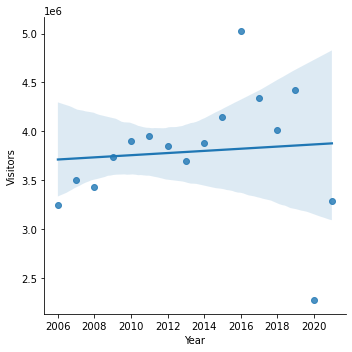

In [45]:
# Plot all Yosemite data

#%sql yosemite_df << SELECT FROM npdf WHERE "Park" = "Yosemite"

yosemite_df = npdf.loc[npdf["Park"] == "Yosemite"] 

sns.lmplot(data=yosemite_df, x= "Year", y ="Visitors") 

Returning data to local variable yosemite_2020


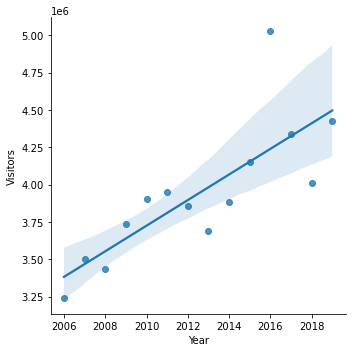

In [52]:
# Plot Yosemite data before 2020
%sql yosemite_2020 << SELECT * FROM yosemite_df WHERE Year < '2020'

sns.lmplot(data=yosemite_2020, x= "Year", y ="Visitors") 

**What are the differences between the figures? What changed, and why does it affect our model's fit?**

The visual is quite different because the regression line now has a slope. The years we are taking from changed, and so did the number of visitors-- this means that now potential outliers caused by the pandemic no longer impact our regression line. 

## Problem 10 (10 points)
From this point on, **we will only work with data prior to the pandemic**. Create a new version of `national_park_df` where the latest possible year is 2019. 

Then, using either pandas or SQL (whichever you prefer) create two new tables with only the most visited and least visited park data. Do the following:
- Create a new table called `average_park_visitors_df` that groups data by park and finds the overall average of visitors. 
  - note: if you use pandas, you may need to reset the index. 
- Sort values in this table by number of average visitors, in **descending** order. 
- Create a list of the top four parks in a variable called `most_visited_parks` and a list of the lowest four parks in a variable called `least_visited_parks`. Print these lists. 
- Create two tables, `most_visited_parks_df` and `least_visited_parks_df` that only have data from the appropriate list of parks. 


In [65]:
# Remove years above 2019 from national_park_df
%sql npdf_2019 << SELECT * FROM npdf WHERE Year < '2020' 

#npdf_2019 = npdf_2019.groupby("Park") 

Returning data to local variable npdf_2019


In [125]:
%sql SELECT * FROM npdf_2019 ORDER BY "Visitors" DESC 
average_park_visitors_df = npdf_2019.groupby("Park")["Visitors"].mean() 
average_park_visitors_df = pd.DataFrame(average_park_visitors_df) 
average_park_visitors_df = average_park_visitors_df.reset_index()

%sql average_park_visitors_df << SELECT * FROM average_park_visitors_df ORDER BY "Visitors" DESC 
print (average_park_visitors_df)






Returning data to local variable average_park_visitors_df
                               Park      Visitors
0             Great Smoky Mountains  1.015303e+07
1                      Grand Canyon  4.999693e+06
2                          Yosemite  3.938812e+06
3                       Yellowstone  3.583847e+06
4                    Rocky Mountain  3.527022e+06
..                              ...           ...
58  National Park of American Samoa  1.927543e+04
59                      Isle Royale  1.892643e+04
60                       Lake Clark  1.260864e+04
61              Gates of the Arctic  1.081550e+04
62                     Kobuk Valley  9.290929e+03

[63 rows x 2 columns]


In [124]:
# Create and print lists of most and least visited parks



least_visited_parks = average_park_visitors_df.iloc[:4, :]
least_visited_parks = least_visited_parks["Park"].values.tolist()
print (least_visited_parks)

most_visited_parks = average_park_visitors_df.iloc[59:, :]
most_visited_parks = most_visited_parks["Park"].values.tolist()
print(most_visited_parks)
 


['Great Smoky Mountains', 'Grand Canyon', 'Yosemite', 'Yellowstone']
['Isle Royale', 'Lake Clark', 'Gates of the Arctic', 'Kobuk Valley']


In [109]:
# Create dataframes for most and least visited parks


%sql most_visited_parks_df << SELECT * FROM  npdf_2019 WHERE Park in ('Great Smoky Mountains', 'Grand Canyon', 'Yosemite', 'Yellowstone') 
%sql least_visited_parks_df << SELECT * FROM  npdf_2019 WHERE Park in ('Isle Royale', 'Lake Clark', 'Gates of the Arctic', 'Kobuk Valley')


Returning data to local variable most_visited_parks_df
Returning data to local variable least_visited_parks_df


# Problem 11 (10 points)

- Create a plotting function, `plot_by_park` that takes any dataframe and creates a linear regression plot (again with `lmplot`). Use the `hue` parameter to plot multiple park's regression model fit on the same graph.
- Plot a linear regression model for the most visited parks, but use the `hue` parameter to keep each park's data distinct. Do the same for least visited parks in a second figure. 

In [110]:
# Create plotting function
def plot_by_park(df): 
    plot = sns.lmplot(data = df, x = "Year", y = "Visitors", hue= 'Park') 

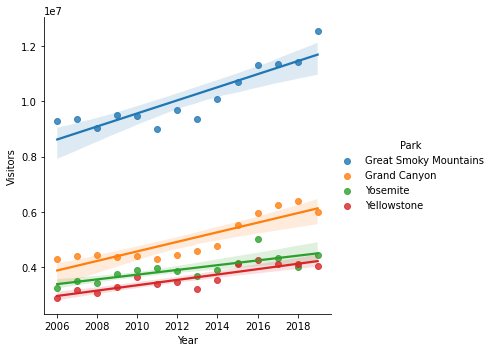

In [111]:
# Plot most visited parks
plot_by_park(most_visited_parks_df)

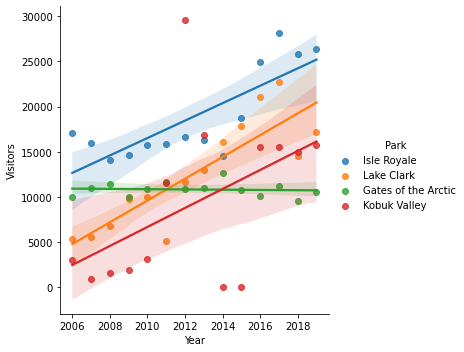

In [112]:
# Plot least visited parks

plot_by_park(least_visited_parks_df)

## Problem 12 (5 points)
Use a combination of `groupby` and `plot_by_park` to plot a regression for each region, subset by park. 

**Confidence check:** You should print out a plot for each region. Each region's plot should have the same number of regression lines as parks in that region. 

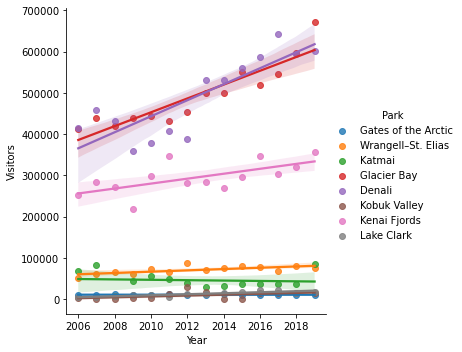

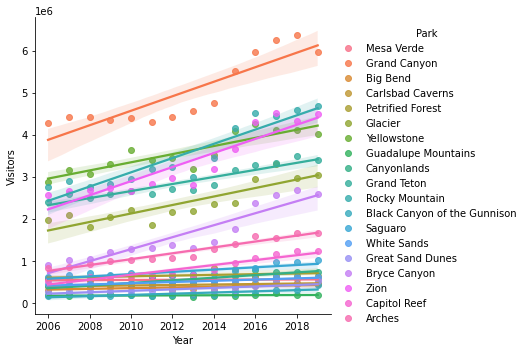

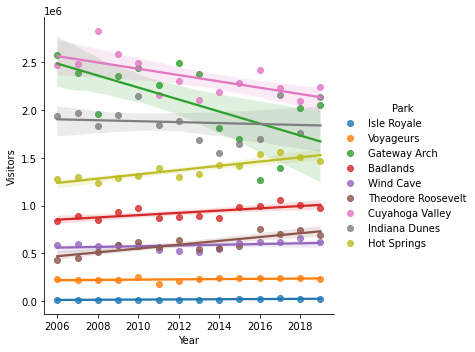

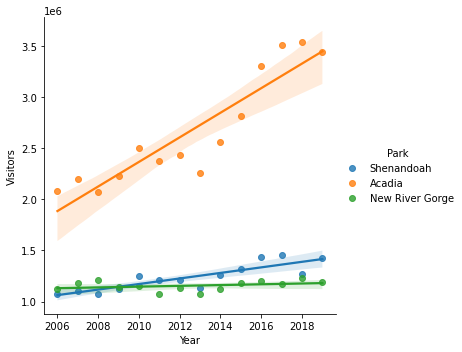

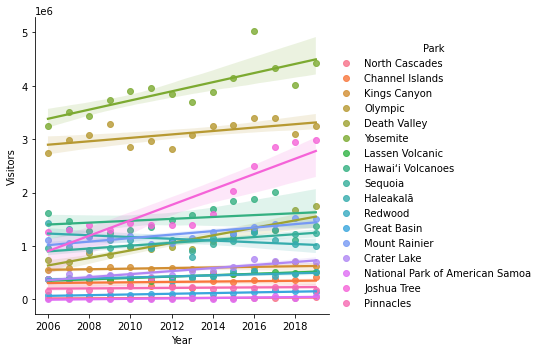

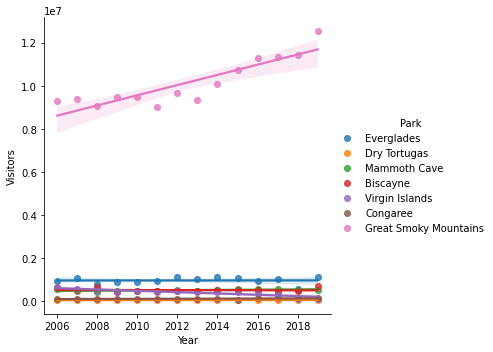

In [116]:
# Print parks by region

npdf_2019.groupby('Region').apply(plot_by_park)
plt.show()

## Problem 13 (5 points)
In the last problem, you plotted regressions for each region. Review these figures, and then consider the following:
- How could these figures be improved? Identify three ways that the plots could better visualize this information. 
- Implement one improvement. 


**Three improvements:**
1. Improvement 1: One improvement would be to find and remove outliers (it's hard to determine if there are any points technically classified as outliers, but it would be a good idea to run some type of function to check for this, and then remove them). 

2. Improvement 2: One improvement would be to change the y axis to regular numbers instead of using "0- 1e7"  or somehow better denote that. Perhaps by selecting a more recent amount of data for the line-- for example, for 2012-2019 since the data from the early 2000s and situation might be diferent from the more recent data and not a good predcition for the future (which is an application of such graphs) 

3. Improvement 3: Some parks seem cyclic or quadratic in the change of visitors so maybe using a different function for the regression line for these parks would be useful 

implement one change here: using data from 2014-2019 only-- This shows graphs for a more 7 year period. I felt that this is a potential improvement because it makes the graphs less crowded and also includes data from a more recent timeset, and might be better for making future predictions since 2012-2019 feels quite different from 2006-2014 in terms of people's park visitaion/cultural habits 

Returning data to local variable npdf2012_2019


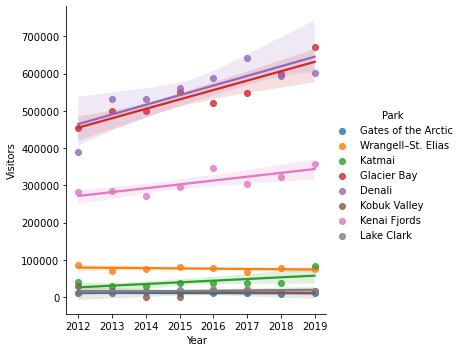

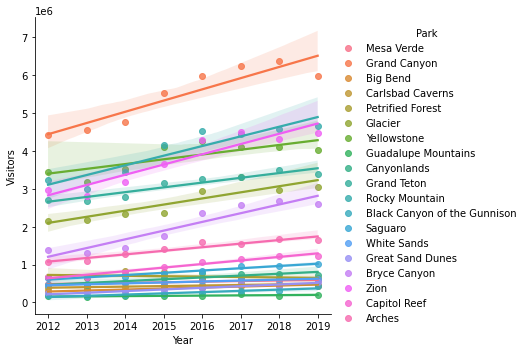

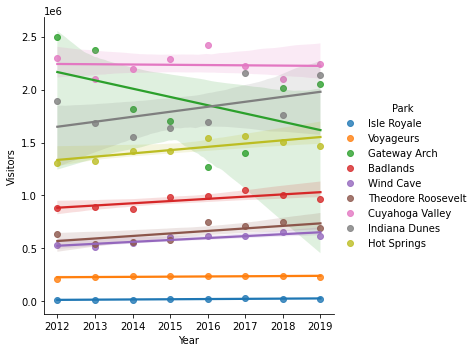

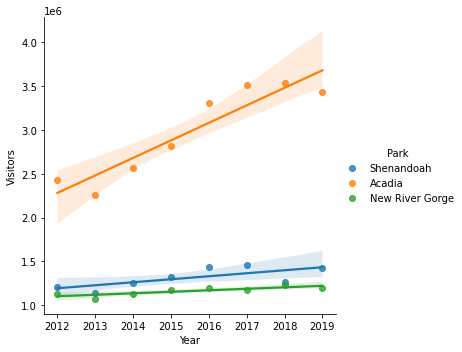

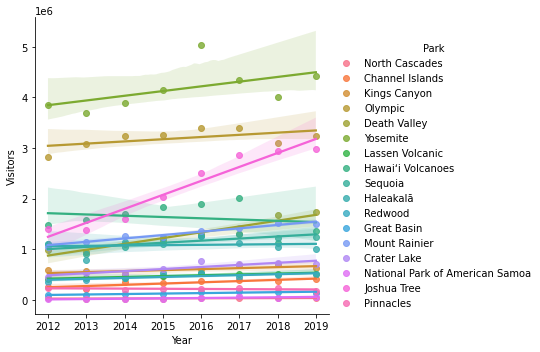

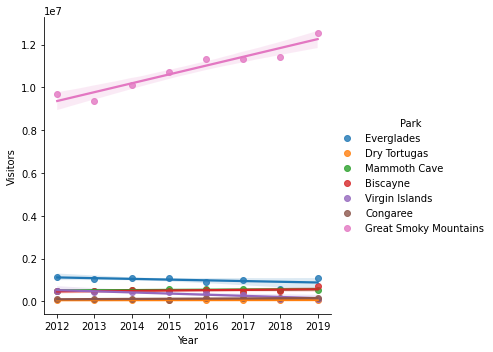

In [121]:
# implement one change here: using data from 2014-2019 only-- so this is showing graphs for a more 7 year period,. 


%sql npdf2012_2019 << SELECT * FROM npdf WHERE Year < '2020' and Year > '2011'
npdf2012_2019.groupby('Region').apply(plot_by_park)
plt.show()
